# 1.데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_csv('customer_join.csv')
uselog = pd.read_csv('use_log.csv')

In [3]:
#고객데이터 null값 확인
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [4]:
# 고객 사용 로그 데이터 null값 확인
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


# 클러스트링: 회원 그룹화

## 2.1 고객의 한달 이용 이력 데이터를 활용한 클러스터링

### 데이터 불러오기

In [5]:
customer.columns

Index(['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date',
       'campaign_id', 'is_deleted', 'class_name', 'price', 'campaign_name',
       'mean', 'median', 'max', 'min', 'routine_flg', 'calc_date',
       'membership_period'],
      dtype='object')

In [6]:
# 고객의 회원기간과 월별 이용 횟수 관련 컬럼 불러오기
customer_clustering = customer[['mean','median', 'max', 'min', 'membership_period']]
customer_clustering

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47
...,...,...,...,...,...
4187,8.000000,8.0,8,8,1
4188,10.000000,10.0,10,10,1
4189,8.000000,8.0,8,8,1
4190,11.000000,11.0,11,11,1


### 클러스터링 : 4개 그룹으로 진행

In [7]:
# 모듈 불러오기
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [9]:
#고객을 4개의 그룹으로 비지도 학습 클러스터링 진행
kmeans = KMeans(n_clusters=4, random_state=235)
clusters = kmeans.fit(customer_clustering_sc)

In [10]:
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering

[1 3 0 2]


<ipython-input-10-d52e52f23b52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering['cluster'] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2
4188,10.000000,10.0,10,10,1,2
4189,8.000000,8.0,8,8,1,2
4190,11.000000,11.0,11,11,1,2


### 클러스터링 결과분석

In [11]:
#월 이용 횟수의 컬럼명을 알아보기 쉽게 변경
customer_clustering.columns=['월평균이용수','월중앙값','월최댓값','월최솟값','회원기간','cluster']
customer_clustering

,월평균이용수,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2
4188,10.000000,10.0,10,10,1,2
4189,8.000000,8.0,8,8,1,2
4190,11.000000,11.0,11,11,1,2


In [12]:
#각 군집별 회원 수
customer_clustering.groupby('cluster').count()

,월평균이용수,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1338,1338,1338,1338,1338
1,1241,1241,1241,1241,1241
2,841,841,841,841,841
3,772,772,772,772,772


In [13]:
# 그룹 특징 파악
customer_clustering.groupby('cluster').mean()

,월평균이용수,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,5.536181,5.387145,8.751121,2.704036,14.931988
1,4.675855,4.670830,7.228042,2.149879,36.984690
2,8.061076,8.046373,10.015458,6.171225,7.027348
3,3.066008,2.900259,4.787565,1.648964,9.291451


- 0 그룹 : 회원기간이 평균 1년 이상이며 이용 빈도가 2번 째로 많은 그룹
- 1 그룹 : 회원기간이 평균 36개월 정도이며 이용 빈도가 3번째로 많은 그룹
- 2 그룹 : 회원기간이 평균 7개월 정도로 가장 짧지만 이용빈도는 가장 많은 그룹
- 3 그룹 : 회원기간이 평균 9개월로 2번째로 짧으며 이용 빈도도 가장 적은 그룹

### 클러스터링 결과 시각화

In [14]:
#시각화를 위한 차원 축소
from sklearn.decomposition import PCA

X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

In [15]:
pca_df

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1
...,...,...,...
4187,3.027933,1.139635,2
4188,5.064720,0.769684,2
4189,3.027933,1.139635,2
4190,6.083114,0.584708,2


In [16]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

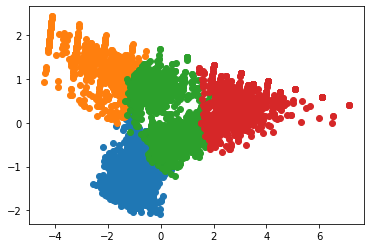

In [17]:
for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

# 3. 탈퇴 회원 경향 파악

In [18]:
customer_clustering=pd.concat([customer_clustering, customer], axis=1)

In [19]:
customer_clustering

,월평균이용수,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,1,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,1,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,1,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,1,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,1,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2,HD676663,XXXX,C01,M,...,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,10.000000,10.0,10,10,1,2,HD246549,XXXXX,C01,F,...,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,8.000000,8.0,8,8,1,2,GD037007,XXXXX,C03,M,...,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,11.000000,11.0,11,11,1,2,OA953150,XXXXX,C01,M,...,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [20]:
customer_clustering.groupby(['cluster','is_deleted'],as_index=False)['customer_id'].count()

,cluster,is_deleted,customer_id
0,0,0,796
1,0,1,542
2,1,0,1224
3,1,1,17
4,2,0,822
5,2,1,19
6,3,1,772


- 0 그룹 : 회원기간이 평균 1년 이상이며 이용 빈도가 2번 째로 많은 그룹
- 1 그룹 : 회원기간이 평균 36개월 정도이며 이용 빈도가 3번째로 많은 그룹
- 2 그룹 : 회원기간이 평균 7개월 정도로 가장 짧지만 이용빈도는 가장 많은 그룹
- 3 그룹 : 회원기간이 평균 9개월로 2번째로 짧으며 이용 빈도도 가장 적은 그룹

- 그룹 0은 탈퇴회원과 유지 회원이 격차가 크지 않으며,
- 그룹 1은 이용 기간도 길고 유지 회원도 많아서 비교적 안정적인 그룹이며,
- 그룹 2는 이용 기간이 짧아서 초반에 의욕적으로 하는 인원이 많은 그룹
- 그룹 3은 탈퇴 회원만 있음 -> 이용 빈도가 가장 적었던 그룹

In [21]:
# 정기 , 비정기 이용 여부 확인
customer_clustering.groupby(['cluster','routine_flg'],as_index=False)['customer_id'].count()

,cluster,routine_flg,customer_id
0,0,0,226
1,0,1,1112
2,1,0,2
3,1,1,1239
4,2,0,52
5,2,1,789
6,3,0,499
7,3,1,273


- 그룹 3은 모두 탈퇴 하였고, 비정기 사용이 더 많음

# 4. 다음 달 이용 횟수 예측: 회귀 분석

In [22]:
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [23]:
uselog['usedate']

0         2018-04-01
1         2018-04-01
2         2018-04-01
3         2018-04-01
4         2018-04-01
             ...    
197423    2019-03-31
197424    2019-03-31
197425    2019-03-31
197426    2019-03-31
197427    2019-03-31
Name: usedate, Length: 197428, dtype: object

In [24]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')

In [25]:
uselog_month = uselog.groupby(['연월', 'customer_id'],as_index=False).count()
uselog_month.rename(columns={'log_id' : 
                             'count'}, inplace=True)
del uselog_month['usedate']
uselog_month

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [26]:
year_month = list(uselog_month['연월'].unique())
len(year_month)

12

In [27]:
year_month[6]

'201810'

In [28]:
uselog_month.loc[uselog_month['연월']==year_month[6]]

,연월,customer_id,count
18532,201810,AS002855,3
18533,201810,AS008805,2
18534,201810,AS009373,5
18535,201810,AS015233,7
18536,201810,AS015315,4
...,...,...,...
21597,201810,TS995299,4
21598,201810,TS998593,9
21599,201810,TS999079,6
21600,201810,TS999231,5


In [29]:
predict_data = pd.DataFrame()

In [30]:
#2018년 10월 부터 2019년 3월 까지 과거 6개월 분의 이용데이터 취득

for i in range(6 , len(year_month)):
    tmp = uselog_month.loc[uselog_month['연월']==year_month[i]]
    tmp.rename(columns={'count' : 'count_this_month'} ,inplace=True)
    for j in range(1, 7):
        tmp_before = uselog_month.loc[uselog_month['연월'] == year_month[i-j]]
        del tmp_before['연월']
        tmp_before.rename(columns={'count': '{}_month_before'.format(j)}, inplace=True)
        tmp = pd.merge(tmp, tmp_before, on='customer_id', how='left')
        
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)

predict_data

C:\Users\siras\anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
18305,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaN
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [31]:
# 결측치 처리 -> 6개월 이상 유지하고 있는 회원
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data

,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


## 4.1 특징이 되는 변수추가 하기

In [33]:
customer.columns

Index(['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date',
       'campaign_id', 'is_deleted', 'class_name', 'price', 'campaign_name',
       'mean', 'median', 'max', 'min', 'routine_flg', 'calc_date',
       'membership_period'],
      dtype='object')

In [35]:
# 등록시작 한 일정 추가
predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date']], on='customer_id', how='left')
predict_data

,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01


### 연월과 start_date 차이를 계산하여 기간 확인

In [39]:
predict_data['now_date']=pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data

,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date,now_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01


In [41]:
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

In [42]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15113 entries, 0 to 15112
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   연월                15113 non-null  object        
 1   customer_id       15113 non-null  object        
 2   count_this_month  15113 non-null  int64         
 3   1_month_before    15113 non-null  float64       
 4   2_month_before    15113 non-null  float64       
 5   3_month_before    15113 non-null  float64       
 6   4_month_before    15113 non-null  float64       
 7   5_month_before    15113 non-null  float64       
 8   6_month_before    15113 non-null  float64       
 9   start_date        15113 non-null  datetime64[ns]
 10  now_date          15113 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 1.4+ MB


In [43]:
from dateutil.relativedelta import relativedelta

In [48]:
predict_data['period'] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = delta.years * 12 + delta.months

predict_data

<ipython-input-48-c6cbf0a58c99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = delta.years * 12 + delta.months


,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01,42
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01,6
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01,33
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01,24


## 회귀분석 모델링

In [50]:
# 2018년 4월 이후 데이터만 추출 : 오래전 부터 있던 회원은 이미 안정적이기 때문에 2018년 4월 이후 가입자만 추출해서 예측 모델 구축
predict_data = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]
predict_data

,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date,now_date,period
49,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
55,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
56,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
72,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
96,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15097,201903,TS964483,7,8.0,5.0,6.0,9.0,8.0,8.0,2018-06-01,2019-03-01,9
15103,201903,TS977703,7,8.0,6.0,7.0,5.0,8.0,8.0,2018-04-15,2019-03-01,10
15104,201903,TS978415,7,10.0,7.0,6.0,10.0,8.0,6.0,2018-07-06,2019-03-01,7
15106,201903,TS985617,10,10.0,10.0,9.0,8.0,8.0,9.0,2018-09-12,2019-03-01,5


In [52]:
#모델링 모듈 임포트

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
predict_data.set_index('customer_id')

,연월,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date,now_date,period
customer_id,,,,,,,,,,,
AS185951,201810,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
AS197200,201810,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
AS200286,201810,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
AS251169,201810,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
AS345469,201810,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5
...,...,...,...,...,...,...,...,...,...,...,...
TS964483,201903,7,8.0,5.0,6.0,9.0,8.0,8.0,2018-06-01,2019-03-01,9
TS977703,201903,7,8.0,6.0,7.0,5.0,8.0,8.0,2018-04-15,2019-03-01,10
TS978415,201903,7,10.0,7.0,6.0,10.0,8.0,6.0,2018-07-06,2019-03-01,7


In [66]:
feature_data = predict_data[['1_month_before','2_month_before','3_month_before',
                             '4_month_before','5_month_before','6_month_before','period']]

feature_data = feature_data.set_index(predict_data['customer_id'])

target_data = predict_data['count_this_month']

In [67]:
feature_data

,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,period
customer_id,,,,,,,
AS185951,5.0,3.0,3.0,7.0,3.0,10.0,5
AS197200,6.0,8.0,9.0,6.0,8.0,8.0,5
AS200286,6.0,3.0,6.0,6.0,7.0,10.0,5
AS251169,4.0,6.0,5.0,8.0,10.0,7.0,5
AS345469,3.0,5.0,6.0,5.0,4.0,7.0,5
...,...,...,...,...,...,...,...
TS964483,8.0,5.0,6.0,9.0,8.0,8.0,9
TS977703,8.0,6.0,7.0,5.0,8.0,8.0,10
TS978415,10.0,7.0,6.0,10.0,8.0,6.0,7


In [68]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data, random_state=235)

In [71]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
# 모델 정확도 확인 : train, test 모두 60% 

print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.6079781476373085
0.6065466669269307


In [75]:
# 모델 기여 변수 확인
coef = pd.DataFrame({'feature_names' : feature_data.columns, 'cofficient': model.coef_})
coef

,feature_names,cofficient
0,1_month_before,0.337768
1,2_month_before,0.184275
2,3_month_before,0.159716
3,4_month_before,0.203941
4,5_month_before,0.073341
5,6_month_before,0.076266
6,period,0.073330


- 변수 기여도가 과거로 올라 갈 수록 낮지만 4개월전 이용량 변수는 20% 정도 변수 기여도가 있음
- 정기 회원 중 4개월 단위로 등록하는 회원이 비교적 많다고 추측할 수 있음

In [76]:
predict_data

,연월,customer_id,count_this_month,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,start_date,now_date,period
49,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
55,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
56,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
72,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
96,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15097,201903,TS964483,7,8.0,5.0,6.0,9.0,8.0,8.0,2018-06-01,2019-03-01,9
15103,201903,TS977703,7,8.0,6.0,7.0,5.0,8.0,8.0,2018-04-15,2019-03-01,10
15104,201903,TS978415,7,10.0,7.0,6.0,10.0,8.0,6.0,2018-07-06,2019-03-01,7
15106,201903,TS985617,10,10.0,10.0,9.0,8.0,8.0,9.0,2018-09-12,2019-03-01,5


In [78]:
uselog_month.to_csv('use_log_month.csv', index=False)

# 임의의 고객 다음 달 이용 횟수 예측

In [79]:
x1 = [3,3,4,5,6,7,8]  # 각각 1~6달전 이용 횟수 데이터
x2 = [1,3,4,5,6,7,8]

In [80]:
x_pred = [x1, x2]
model.predict(x_pred)

array([3.31327538, 2.63773957])

- x1 고객은 다음달 약 3.31회 이용 , x2 고객은 약 2.63회 이용할 가능성이 높음